<a href="https://colab.research.google.com/github/Tomawock/MLDM_COVID-19/blob/master/decisionTree/extraTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 30
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import r2_score, mean_squared_error, max_error

from sklearn.ensemble import ExtraTreesRegressor


import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
import pandas as pd
import os
os.chdir("/content/drive/Shared drives/MLDM progetto/Datasets/dataset_finali")

Autosaving every 30 seconds
Drive not mounted, so nothing to flush and unmount.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

df_2 = pd.read_csv("dataset_finale_medie_2_week_rnd1.csv", parse_dates=["Data"], infer_datetime_format=True)
df_0 = pd.read_csv("dataset_finale_medie_rnd1.csv", parse_dates=["Data"], infer_datetime_format=True)

rnd_state = 432145
predictor_columns = [
                     'pass_Ammoniaca', 
                     'pass_Benzene',
       'pass_Biossido di Azoto', 
       'pass_Biossido di Zolfo',
       'pass_Monossido di Azoto', 
       'pass_Monossido di Carbonio',
       'pass_Ossidi di Azoto', 
       'pass_Ozono', 
       'pass_PM10 (SM2005)',
       'pass_Particelle sospese PM2.5',
       'pass_Radiazione Globale', 
       'pass_Temperatura',
       'pass_deceduti',
       'pass_nuovi_positivi',
       'pass_ricoverati_con_sintomi', 
       'pass_tamponi']

In [ ]:
train_2 = df_2.sample(frac=0.70, random_state=rnd_state)
test_2 = df_2.drop(train_2.index)

train_X_2 = train_2[predictor_columns]
train_y_2 = train_2["fut1_nuovi_positivi"]

test_X_2 = test_2[predictor_columns]
test_y_2 = test_2["fut1_nuovi_positivi"]

In [ ]:
train_0 = df_0.sample(frac=0.70, random_state=rnd_state)
test_0 = df_0.drop(train_0.index)

train_X_0 = train_0[predictor_columns]
train_y_0 = train_0["fut1_nuovi_positivi"]

test_X_0 = test_0[predictor_columns]
test_y_0 = test_0["fut1_nuovi_positivi"]

In [ ]:
extra_tree_regressor = ExtraTreesRegressor(bootstrap=False,random_state=rnd_state)


In [ ]:
pipeline = Pipeline([("imp", SimpleImputer(missing_values=np.nan, strategy="mean")), 
                     ("clf", extra_tree_regressor)])

In [ ]:
imp=SimpleImputer(missing_values=np.nan, strategy="mean")
imp=imp.fit(train_X_2)

In [ ]:
n_estimators_list = [100]
criterion_list = ["mse", "mae"]
max_depth_list = [None, 5, 6]
min_samples_split_list = [2, 3]
min_samples_split_leaf_list = [3,5]
min_weight_fraction_leaf_list = [0.0, 0.1]
max_features_list = ["auto", "sqrt", "log2"]
max_leaf_nodes_list = [None, 10, 25]
min_impurity_decrease_list = [0.0, 0.1]

param_grd = { "n_estimators":n_estimators_list,
              "criterion": criterion_list,
              "max_depth": max_depth_list,
              "min_samples_split": min_samples_split_list,
              "min_samples_leaf": min_samples_split_leaf_list,
              "min_weight_fraction_leaf": min_weight_fraction_leaf_list,
              "max_features": max_features_list,
              "max_leaf_nodes": max_leaf_nodes_list,
              "min_impurity_decrease": min_impurity_decrease_list}

In [ ]:
extra_tree_regressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
kfold_splits = 4
grid_regressor_2 = GridSearchCV(extra_tree_regressor, param_grd, 
                              n_jobs=1, 
                              verbose=1)

In [ ]:
grid_regressor_2.fit(imp.transform(train_X_2), train_y_2)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  6.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, ra...
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [None, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log

In [ ]:
kfold_splits = 4
grid_regressor_0 = GridSearchCV(extra_tree_regressor, param_grd, 
                              n_jobs=-1, 
                              verbose=1)

grid_regressor_0.fit(train_X_0, train_y_0)

testing


In [ ]:
best_regressor_2 = grid_regressor_2.best_estimator_

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(test_X_2)
test_X_imp = imputer.transform(test_X_2)

predicted_2 = best_regressor_2.predict(test_X_imp)

In [ ]:
best_regressor_0 = grid_regressor_0.best_estimator_

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(test_X_0)
test_X_imp = imputer.transform(test_X_0)

predicted_0 = best_regressor_0.predict(test_X_imp)

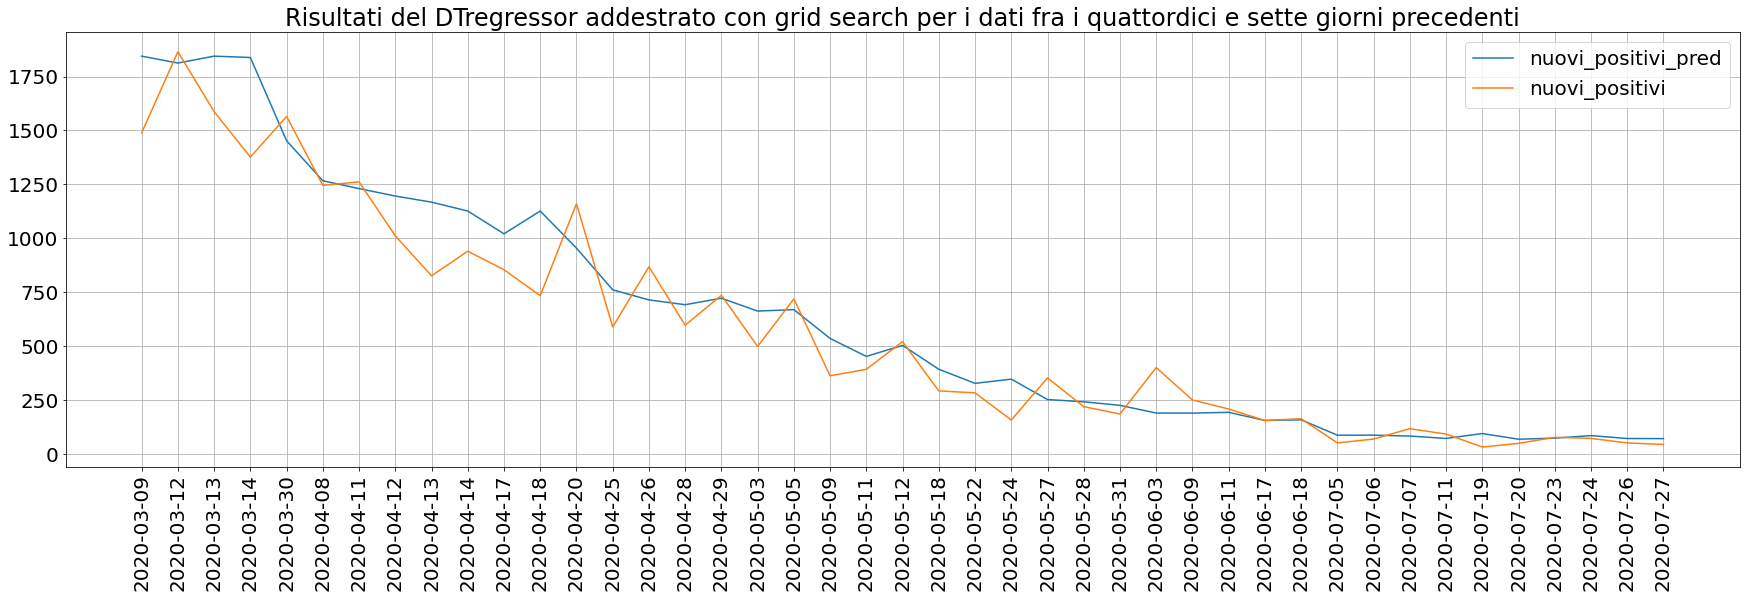

In [ ]:
x_triks=df_2.loc[list(test_X_2.index),['Data']]
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (30, 8)
plt.plot(predicted_2, label="nuovi_positivi_pred")
plt.plot(test_y_2.values, label="nuovi_positivi")
plt.xticks(np.arange(x_triks.shape[0]), (x_triks['Data'].dt.date), rotation=90)
plt.legend()
plt.grid()
plt.title("Risultati del DTregressor addestrato con grid search per i dati fra i quattordici e sette giorni precedenti")
plt.show()

In [ ]:
x_triks=df_0.loc[list(test_X_0.index),['Data']]
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (30, 8)
plt.plot(predicted_0, label="nuovi_positivi_pred")
plt.plot(test_y_0.values, label="nuovi_positivi")
plt.xticks(np.arange(x_triks.shape[0]), (x_triks['Data'].dt.date), rotation=90)
plt.legend()
plt.grid()
plt.title("Risultati del DTregressor addestrato con grid search per i dati fra i quattordici giorni precedenti")
plt.show()

In [ ]:
print(f"R2: \t\t{r2_score(test_y_2, predicted_2):.3}")
print(f"RMSE: \t\t{mean_squared_error(test_y_2, predicted_2, squared=False):.3}")
print(f"MAX ERR: \t{max_error(test_y_2, predicted_2)}")

R2: 		0.902
RMSE: 		1.58e+02
MAX ERR: 	461.02117347294006


In [ ]:
print(f"R2: \t\t{r2_score(test_y_0, predicted_0):.3}")
print(f"RMSE: \t\t{mean_squared_error(test_y_0, predicted_0, squared=False):.3}")
print(f"MAX ERR: \t{max_error(test_y_0, predicted_0)}")

In [ ]:
feature_importance = dict(zip(predictor_columns, best_regressor_2.feature_importances_))

for w in sorted(feature_importance, key=feature_importance.get, reverse=True):
    print(w, feature_importance[w])

pass_deceduti 0.35697929128404654
pass_tamponi 0.18269296721829031
pass_Benzene 0.1215528209582921
pass_Temperatura 0.10429454247652427
pass_ricoverati_con_sintomi 0.06210264919694722
pass_Monossido di Carbonio 0.05355998515791263
pass_nuovi_positivi 0.034376312757415914
pass_Ozono 0.029060217340299888
pass_Monossido di Azoto 0.016889030953977594
pass_Radiazione Globale 0.010134308352780399
pass_Ammoniaca 0.009211053527151186
pass_PM10 (SM2005) 0.004560171527214111
pass_Particelle sospese PM2.5 0.0044991811670239005
pass_Biossido di Zolfo 0.004149892401430945
pass_Ossidi di Azoto 0.003724034519960689
pass_Biossido di Azoto 0.0022135411607324875


In [ ]:
feature_importance = dict(zip(predictor_columns, best_regressor_0.feature_importances_))

for w in sorted(feature_importance, key=feature_importance.get, reverse=True):
    print(w, feature_importance[w])